# Evaluación 3

## Ejercicio 1

### 1.1 Check if your country is a polygon or multipolygon

In [1]:
import os
import geopandas as gpd
from  fiona import listlayers
import matplotlib.pyplot as plt

In [2]:
peruMaps = "https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_24891.gpkg"

In [3]:
listlayers(peruMaps)

['country', 'cities', 'rivers']

In [4]:
#Obtenemos cada mapa:
peru = gpd.read_file(peruMaps,layer="country")
peru_cities = gpd.read_file(peruMaps,layer = "cities")
peru_rivers = gpd.read_file(peruMaps,layer = "rivers")

In [5]:
#Luego, notamos que Peru es un POLIGONO
peru

COUNTRY                                           geometry
0    Peru  POLYGON ((1423874.178 857804.844, 1423768.489 ...

### 1.2 Recover just the boundaries of that country

In [6]:
#Notamos que el borda está formado por una sola línea
peru.boundary

0    LINESTRING (1423874.178 857804.844, 1423768.48...
dtype: geometry

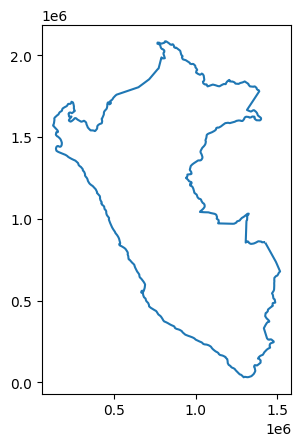

In [7]:
peru.boundary.plot()
plt.show()

### 1.3 Turn the boundary into a GDF

In [8]:
type(peru.boundary)

geopandas.geoseries.GeoSeries

In [9]:
peru.boundary.to_frame()

0
0  LINESTRING (1423874.178 857804.844, 1423768.48...

In [10]:
peru_boundary = peru.boundary.to_frame()

In [11]:
peru_boundary["name"]="Peru"
peru_boundary

0  name
0  LINESTRING (1423874.178 857804.844, 1423768.48...  Peru

In [12]:
peru_boundary.rename(columns={0:"geometry"},inplace=True)
peru_boundary = peru_boundary.set_geometry("geometry")
peru_boundary

geometry  name
0  LINESTRING (1423874.178 857804.844, 1423768.48...  Peru

## Ejercicio 2

De aquí extraje el archivo shp de los bordes de Perú [here](https://data.humdata.org/dataset/cod-ab-per)

### 2.1 Look for sub administrative divisions of your country

In [13]:
peru_dep = gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm1_ign_20200714.shp"))
#peru_dep.plot()

In [14]:
peru_mun = gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm2_ign_20200714.shp"))
#peru_mun.plot()

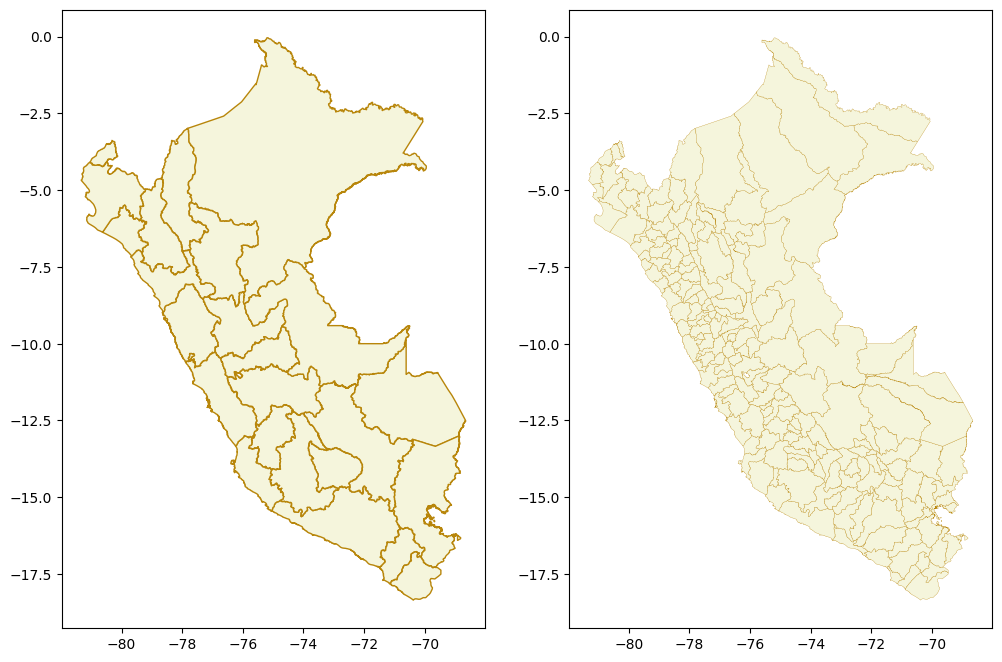

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

peru_dep.plot(ax=ax1, facecolor='beige', edgecolor='darkgoldenrod')
peru_mun.plot(ax=ax2, facecolor='beige', edgecolor='darkgoldenrod',linewidth=0.2)
plt.show()

### 2.2 Check all the CRSs of those divisions

In [16]:
peru_dep.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
peru_mun.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
peru_dep.geometry.head() # efectivamente son mapas no proyectados con crs 4326

0    POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...
1    POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...
2    POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...
3    POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...
4    POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...
Name: geometry, dtype: geometry

### 2.3 If you find one CRS is missing, fill the CRS with the right projection

In [19]:
# Como los dos tienen CRS 4326, ahora los reproyectaré para que tengan unidades de longitud
peru_dep = peru_dep.to_crs(24891)
peru_mun = peru_mun.to_crs(24891)

peru_dep.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

## Ejercicio 3

### 3.1 Look for some points in a CSV file about your country.

In [20]:
import pandas as pd
infohealth = pd.read_csv(os.path.join("data","peru_health_sities.csv"))

infohealth.head()

X          Y      osm_id osm_type  completeness    #meta +operator  \
0 -75.506386 -11.895442  7061666697     node            15  Gobierno Regional   
1 -76.125374 -10.247465  7073535192     node            12  Gobierno Regional   
2 -73.034027 -12.525074  6867639865     node            12  Gobierno Regional   
3 -75.890124 -13.723504  6347881785     node            15  Gobierno Regional   
4 -75.215294 -12.072449  5043483801     node            15                NaN   

   #meta +health_amenity_type #meta+dispensing #meta +speciality  \
0                         NaN              NaN               NaN   
1                         NaN              NaN               NaN   
2                         NaN              NaN               NaN   
3                         NaN              NaN               NaN   
4                         NaN              NaN               NaN   

   #meta+is_in_health_zone  ...  addr_postcode #meta+water_source  addr_city  \
0                      NaN  ...            NaN                NaN        NaN   
1                      NaN  ...            NaN                NaN        NaN   
2                      NaN  ...            NaN                NaN        NaN   
3                      NaN  ...            NaN                NaN        NaN   
4                      NaN  ...            NaN                NaN        NaN   

  #meta+wheelchair #capacity +beds       changeset_user  \
0              NaN             NaN  karitotp_peruimport   
1              NaN             NaN  karitotp_peruimport   
2              NaN             NaN  karitotp_peruimport   
3              NaN             NaN  karitotp_peruimport   
4              NaN             NaN           Baconcrisp   

                                     #geo+bounds+url addr_housenumber  \
0                                                NaN              NaN   
1                                                NaN              NaN   
2                                                NaN              NaN   
3                                                NaN              NaN   
4  Reconocimiento terrestre cartográfico realizad...              NaN   

  #meta+healthcare      #loc +name  
0              NaN      Patacancha  
1              NaN  Ayancocha Alta  
2              NaN   Kamanquiriato  
3              NaN      C.S. Humay  
4              NaN  Farmacia Mafer  

[5 rows x 37 columns]

In [21]:
col=['X','Y','#meta +operator','#loc +name','osm_id']
infohealth=infohealth.loc[:,col]
infohealth

X          Y    #meta +operator      #loc +name      osm_id
0     -75.506386 -11.895442  Gobierno Regional      Patacancha  7061666697
1     -76.125374 -10.247465  Gobierno Regional  Ayancocha Alta  7073535192
2     -73.034027 -12.525074  Gobierno Regional   Kamanquiriato  6867639865
3     -75.890124 -13.723504  Gobierno Regional      C.S. Humay  6347881785
4     -75.215294 -12.072449                NaN  Farmacia Mafer  5043483801
...          ...        ...                ...             ...         ...
13777 -79.001803  -8.085416                NaN         Prodent  5087303549
13778 -74.226451 -13.160537                NaN         Mifarma  3717393199
13779 -76.052600 -11.151853  Gobierno Regional       Sasicucho  7039407129
13780 -79.007135  -8.112350                NaN     Botica Alva  5086928457
13781 -78.644000  -6.509850  Gobierno Regional          Chulit  6863805548

[13782 rows x 5 columns]

In [22]:
infohealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13782 entries, 0 to 13781
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                11657 non-null  float64
 1   Y                11657 non-null  float64
 2   #meta +operator  7191 non-null   object 
 3   #loc +name       13189 non-null  object 
 4   osm_id           13782 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 538.5+ KB


In [23]:
infohealth.rename(columns={'#loc +name':'localizacion'},inplace=True)

In [24]:
infohealth

X          Y    #meta +operator    localizacion      osm_id
0     -75.506386 -11.895442  Gobierno Regional      Patacancha  7061666697
1     -76.125374 -10.247465  Gobierno Regional  Ayancocha Alta  7073535192
2     -73.034027 -12.525074  Gobierno Regional   Kamanquiriato  6867639865
3     -75.890124 -13.723504  Gobierno Regional      C.S. Humay  6347881785
4     -75.215294 -12.072449                NaN  Farmacia Mafer  5043483801
...          ...        ...                ...             ...         ...
13777 -79.001803  -8.085416                NaN         Prodent  5087303549
13778 -74.226451 -13.160537                NaN         Mifarma  3717393199
13779 -76.052600 -11.151853  Gobierno Regional       Sasicucho  7039407129
13780 -79.007135  -8.112350                NaN     Botica Alva  5086928457
13781 -78.644000  -6.509850  Gobierno Regional          Chulit  6863805548

[13782 rows x 5 columns]

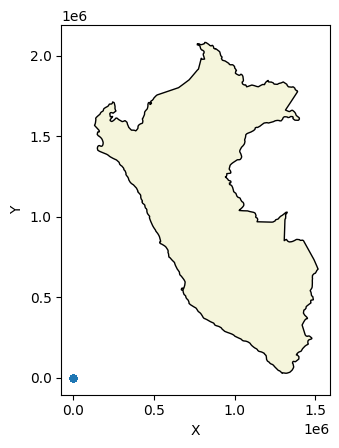

In [25]:
base = peru.plot(color='beige', edgecolor='black')
infohealth.plot.scatter(x = 'X', y = 'Y',ax=base)
plt.show()

### 3.2 Turn those points into a spatial object

In [26]:
#Solucionamos esto dándole un crs al conjunto de puntos
healthsites=gpd.GeoDataFrame(data=infohealth.copy(),geometry=gpd.points_from_xy(infohealth.X,infohealth.Y),crs=4326)

In [27]:
healthsites = healthsites.to_crs(24891)

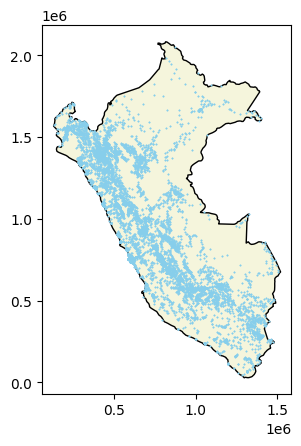

In [28]:
base = peru.plot(color='beige', edgecolor='black')
healthsites.plot(ax=base,edgecolor='skyblue',marker='*',markersize=0.2)
plt.show()

In [29]:
type(healthsites)

geopandas.geodataframe.GeoDataFrame

### 3.3 Save the layer.

In [30]:
healthsites.to_file(os.path.join("maps","peru_health_24891.gpkg"), layer='healthsites', driver="GPKG")

In [40]:
#Comprobamos si funciona bien la capa guardada

In [31]:
peru_health='https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_health_24891.gpkg'

In [32]:
from  fiona import listlayers

listlayers(peru_health)

['healthsites']

In [36]:
health=gpd.read_file(peru_health,layer='healthsites')

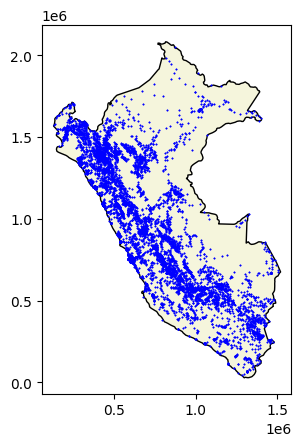

In [39]:
base = peru.plot(color='beige', edgecolor='black')
health.plot(ax=base,marker='*',edgecolor='blue',markersize=0.2)
plt.show()

## Ejercicio 4

### 4.1. Compute the centroid of your country.

In [41]:
centroPeru=peru.centroid
centroPeru

0    POINT (893956.209 1073003.180)
dtype: geometry

In [66]:
centroPeru.x

0    893956.209229
dtype: float64

In [68]:
centroX=centroPeru.x[0]
centroY=centroPeru.y[0]

### 4.2. Combine all the polygons to the north, and also all the polygons to the south; use unary union.

In [58]:
peru_mun.geometry

0      POLYGON ((1045786.713 597763.851, 1045829.940 ...
1      POLYGON ((855015.285 691365.789, 855106.295 69...
2      POLYGON ((1171514.495 557209.271, 1171573.758 ...
3      POLYGON ((539112.829 1022378.869, 539251.073 1...
4      POLYGON ((688325.260 1680594.719, 688563.438 1...
                             ...                        
191    POLYGON ((672376.252 862912.610, 672349.644 86...
192    POLYGON ((715648.858 761385.854, 715761.796 76...
193    POLYGON ((544216.395 1105170.970, 544325.312 1...
194    MULTIPOLYGON (((1478042.136 246305.604, 146635...
195    POLYGON ((246113.049 1713256.626, 246240.857 1...
Name: geometry, Length: 196, dtype: geometry

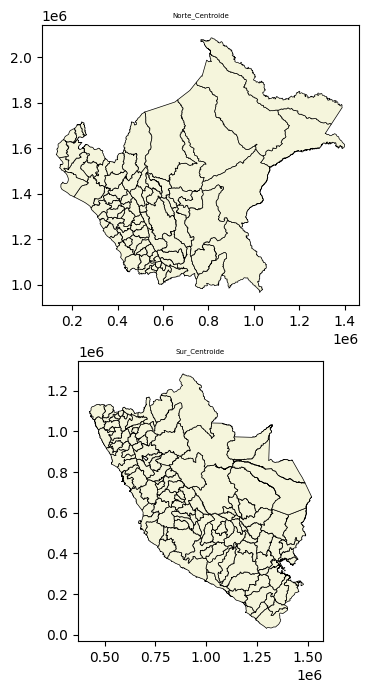

In [72]:
fig, axs = plt.subplots(nrows=2,ncols=1,sharex=False,sharey=False,figsize=(8,8))

axs[0].set_title('Norte_Centroide', fontsize=5)
peru_mun.cx[:,centroY:].plot(ax=axs[0], facecolor='beige', edgecolor='black', linewidth=0.5)

axs[1].set_title('Sur_Centroide',fontsize=5)
peru_mun.cx[:,:centroY].plot(ax=axs[1],facecolor='beige',edgecolor='black',linewidth=0.5) 

plt.show()

In [ ]:
#Combinando todo el norte y todo el sur
#UNARY UNION

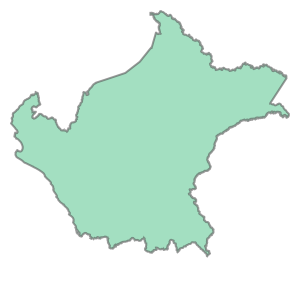

In [74]:
peru_mun.cx[:,centroY:].unary_union

In [75]:
peru_mun.cx[:,:centroY].unary_union

### 4.3. Detect the amount of duplicates after the combination.

### 4.4. Plot both maps so that duplicates appear.